# **Moondream2**

**Install Libraries**

In [1]:
!pip install transformers timm einops

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 4.7 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1

**Import Libraries**

In [2]:
from transformers import AutoModelForCausalLM, AutoTokenizer
from PIL import Image

**Load Tokenizer and Model**

In [4]:
model_id = "vikhyatk/moondream2"
revision = "2024-03-13"
tokenizer = AutoTokenizer.from_pretrained(model_id, revision=revision)
model = AutoModelForCausalLM.from_pretrained(
    model_id, trust_remote_code=True, revision=revision
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/7.34k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/1.08k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/99.0 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


config.json:   0%|          | 0.00/318 [00:00<?, ?B/s]

configuration_moondream.py:   0%|          | 0.00/3.39k [00:00<?, ?B/s]

moondream.py:   0%|          | 0.00/5.41k [00:00<?, ?B/s]

modeling_phi.py:   0%|          | 0.00/49.4k [00:00<?, ?B/s]

vision_encoder.py:   0%|          | 0.00/3.60k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/3.72G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/69.0 [00:00<?, ?B/s]

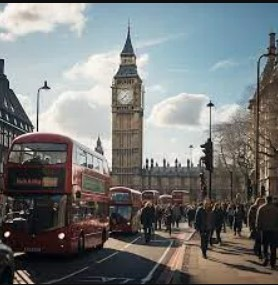

In [7]:
image = Image.open('busy_street.jpg')
image

In [8]:
enc_image = model.encode_image(image)
output = model.answer_question(enc_image, "Describe this image in detail", tokenizer)

class color:
   BLUE = '\033[94m'
   BOLD = '\033[1m'
   END = '\033[0m'

print(color.BOLD+color.BLUE+"Input:"+color.END, "Describe this image in detail")
print(color.BOLD+color.BLUE+"Response:"+color.END, output)

Input: Describe this image in detail
Response: The image captures a bustling city street with a prominent clock tower in the background. The clock tower is located near a busy intersection, surrounded by tall buildings. There are several red double-decker buses driving down the street, with some of them positioned closer to the viewer and others further away.

Numerous people can be seen walking along the sidewalk, contributing to the lively atmosphere of the city. Traffic lights are also visible in the scene, helping to manage the flow of vehicles and pedestrians. Overall, the image portrays a vibrant urban environment with a mix of transportation and pedestrian activity.


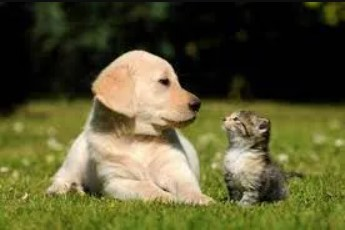

In [10]:
image = Image.open('cat_and_dog.jpg')
image

In [11]:
enc_image = model.encode_image(image)
output = model.answer_question(enc_image, "Write a conversation between the two", tokenizer)

print(color.BOLD+color.BLUE+"Input:"+color.END, "Write a conversation between the two")
print(color.BOLD+color.BLUE+"Response:"+color.END, output)

Input: Write a conversation between the two
Response: Doll: Hello there, little kitten! What a lovely day for a chat, isn't it?

Kitten: Hello, Doll! Yes, it is a lovely day. I'm enjoying the sunshine and the grass.

Doll: I'm enjoying it too, little one. You know, I've always found it fascinating how dogs and cats can get along so well.

Kitten: Yes, it's quite remarkable, isn't it? They may have different ways of communicating, but they can still understand each other and form bonds.

Doll: That's true. Dogs and cats have different body language and vocalizations, but they can learn to interpret and respond to each other's cues. It's like they have their own secret language.

Kitten: It's almost as if they can read each other's minds. They may not understand each other's thoughts, but they can certainly sense each other's emotions and intentions.

Doll: Yes, it's like they have a sixth sense when it comes to understanding each other. They can pick up on subtle cues and body language,

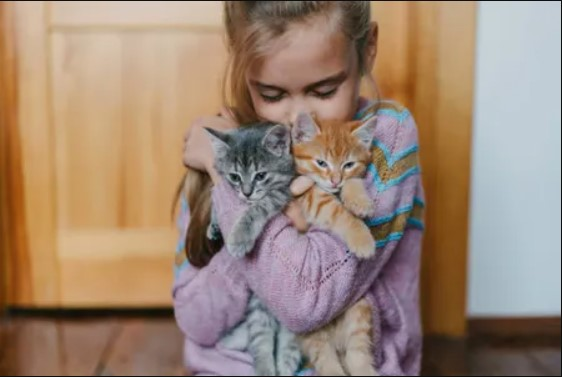

In [12]:
image = Image.open('girl_and_cats.jpg')
image

In [13]:
enc_image = model.encode_image(image)
answer1 = model.answer_question(enc_image, "How many cats the girl is holding?", tokenizer)
answer2 = model.answer_question(enc_image, "what is their color?", tokenizer)

print(color.BOLD+color.BLUE+"Question 1:"+color.END, "How many cats the girl is holding?")
print(color.BOLD+color.BLUE+"Answer 1:"+color.END, answer1)
print(color.BOLD+color.BLUE+"Question 2:"+color.END, "what is their color?")
print(color.BOLD+color.BLUE+"Answer 2:"+color.END, answer2)

Question 1: How many cats the girl is holding?
Answer 1: The girl is holding two cats.
Question 2: what is their color?
Answer 2: The color of the cats is gray and orange.


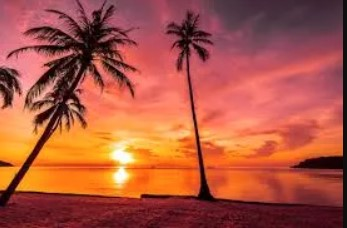

In [14]:
image = Image.open('beach_sunset.jpg')
image

In [15]:
enc_image = model.encode_image(image)
output = model.answer_question(enc_image, "Write a beautiful poem about this image", tokenizer)

print(color.BOLD+color.BLUE+"Input:"+color.END, "Write a beautiful poem about this image")
print(color.BOLD+color.BLUE+"Response:"+color.END, output)

Input: Write a beautiful poem about this image
Response: At sunset, the sky is ablaze,
With hues of red and gold, so serene.
Two palm trees stand tall and proud,
Their shadows cast on the beach, so serene.

The ocean waves gently lap the shore,
As the sun dips below the horizon, so serene.
The sky is filled with clouds, so vast,
A perfect backdrop for this beautiful scene, so vast.


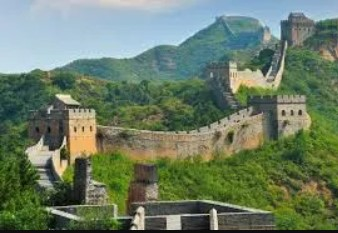

In [17]:
image = Image.open('the_great_wall_of_china.jpg')
image

In [18]:
enc_image = model.encode_image(image)
output = model.answer_question(enc_image, "Tell about the history of this place", tokenizer)

print(color.BOLD+color.BLUE+"Input:"+color.END, "Tell about the history of this place")
print(color.BOLD+color.BLUE+"Response:"+color.END, output)

Input: Tell about the history of this place
Response: The image showcases the Great Wall of China, a historical and iconic landmark that stretches over 13,000 miles across the country. The wall was built to protect the Chinese states and empires from invasions and has become a symbol of Chinese culture and heritage. The Great Wall is made of stone, brick, tamped earth, and wood, and is known for its impressive architecture and engineering. The wall is situated on a lush green hillside, providing a picturesque backdrop to the massive structure. The Great Wall is not only a testament to the architectural prowess of the builders but also a reminder of the rich history and cultural significance of the region.


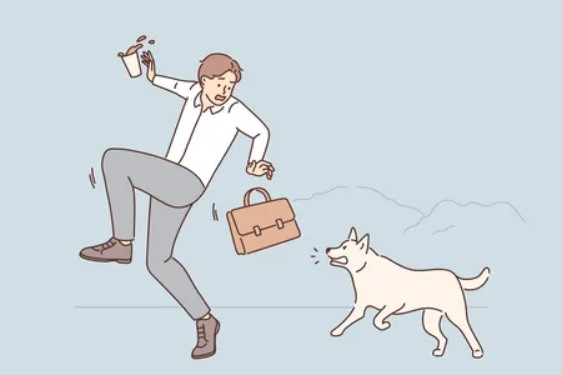

In [19]:
image = Image.open('man_and_dog.jpg')
image

In [20]:
enc_image = model.encode_image(image)
output = model.answer_question(enc_image, "what does the man feel and why?", tokenizer)

print(color.BOLD+color.BLUE+"Input:"+color.END, "what does the man fell and why?")
print(color.BOLD+color.BLUE+"Response:"+color.END, output)

Input: what does the man fell and why?
Response: The man in the image feels surprised and startled as he sees his briefcase being taken away by the dog. This reaction can be attributed to the unexpectedness of the situation, as it is not common for a dog to take someone's briefcase away. The man might be caught off guard, trying to understand why the dog is taking his briefcase, and possibly feeling a mix of annoyance, confusion, or even amusement at the unusual event.


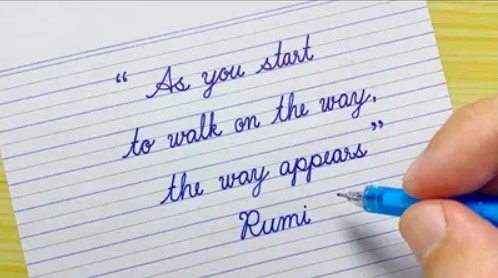

In [21]:
image = Image.open('written_quote.jpg')
image

In [22]:
enc_image = model.encode_image(image)
output = model.answer_question(enc_image, "what's written on this piece of paper?", tokenizer)

print(color.BOLD+color.BLUE+"Input:"+color.END, "what's written on this piece of paper?")
print(color.BOLD+color.BLUE+"Response:"+color.END, output)

Input: what's written on this piece of paper?
Response: The words "As you start, walk on the way, to walk on the way, the way appears" are written on the piece of paper.
